In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


%matplotlib inline

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques

In [3]:
train_data_formodel_transformed = train_data_formodel.copy(deep = True)

In [4]:
cols_for_plot = train_data_formodel.columns.values[9:-1]

/home/robert/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


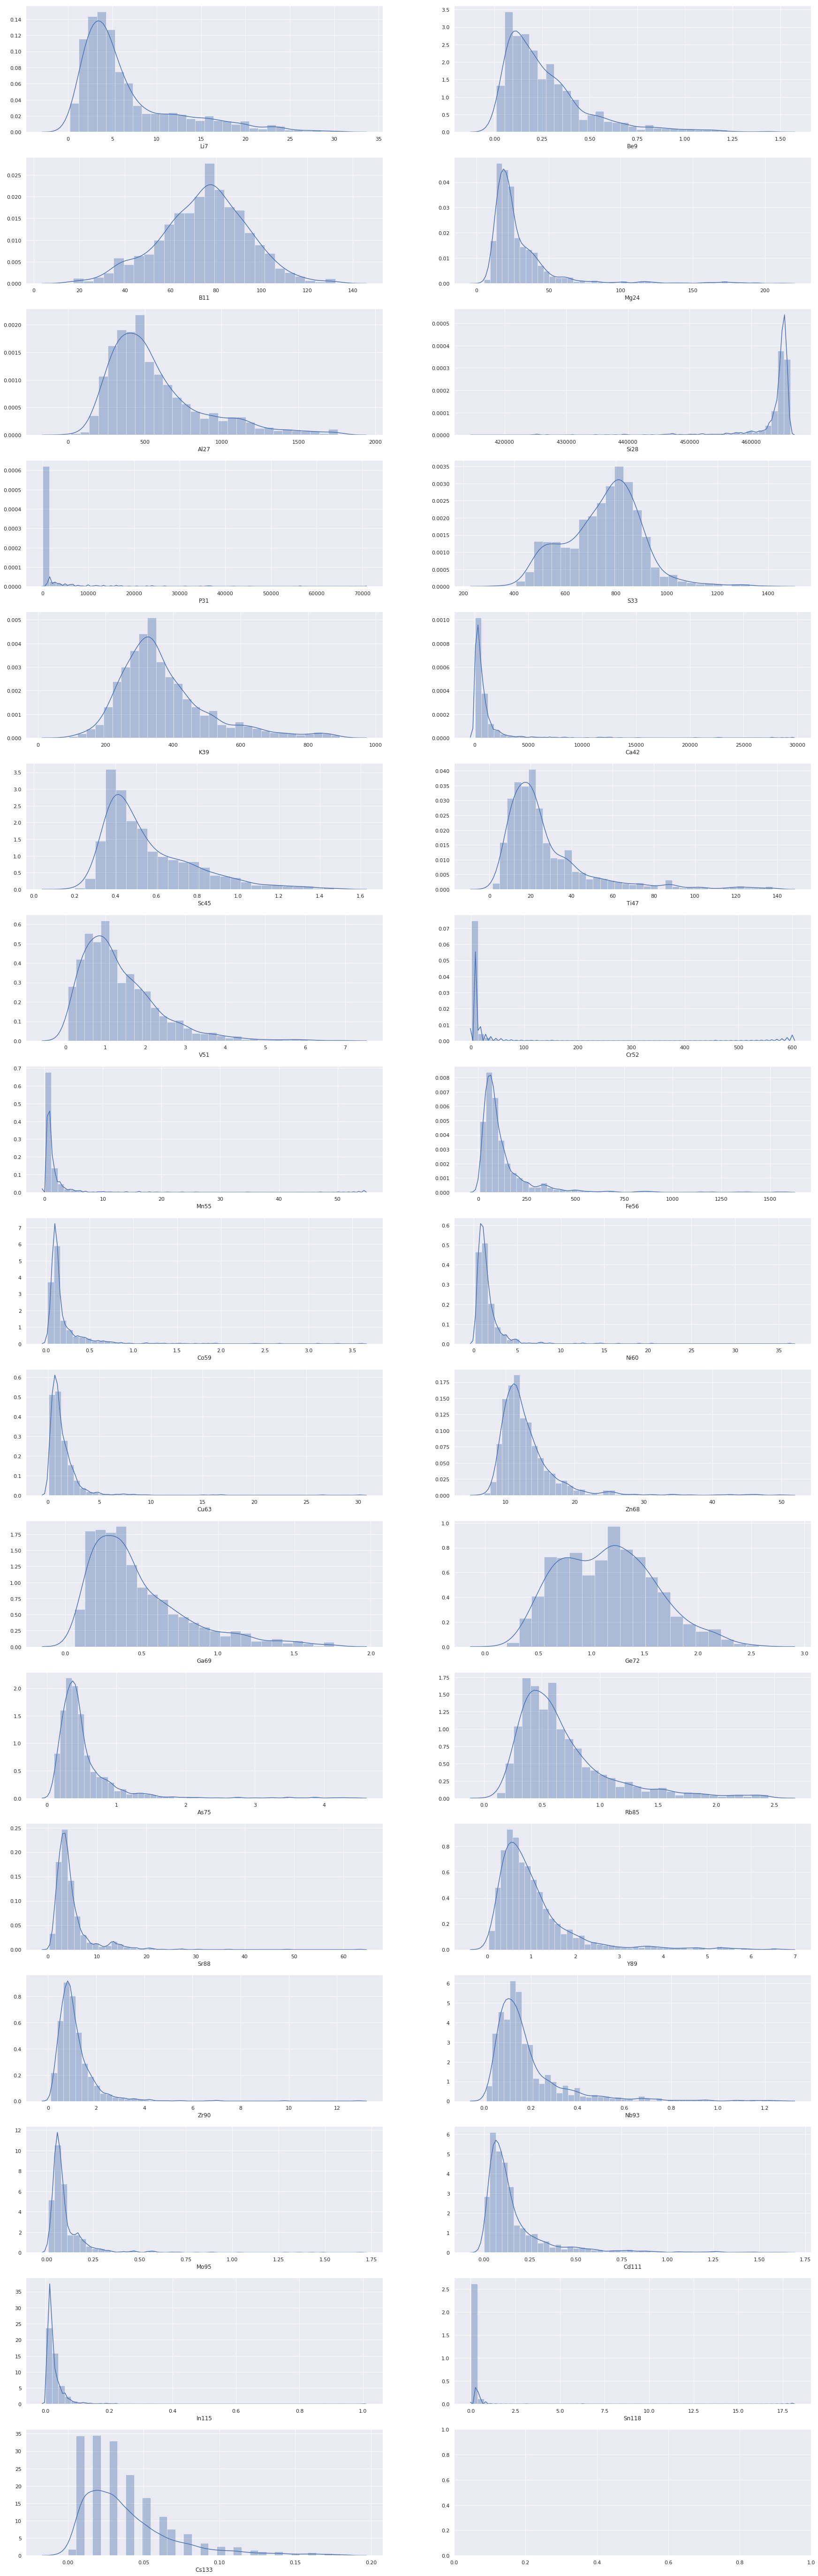

In [5]:


sns.set(rc={'figure.figsize':(30,100)})

plot_coor = [c for c in range(0,33)] 

fig, axs = plt.subplots(ncols=2, nrows=17) 
axs = axs.flatten()

for col_name, plot_coor in zip(list(cols_for_plot), plot_coor): 
    sns.distplot(train_data_formodel[cols_for_plot][col_name], ax = axs[plot_coor])

    

In [6]:

for column in ['Li7', 'Be9', 'Mg24', 'Al27','P31', 'K39',
 'Ca42', 'Sc45', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe56', 'Co59', 'Ni60', 'Cu63',
 'Zn68', 'Ga69', 'Ge72', 'As75', 'Rb85', 'Sr88', 'Y89', 'Zr90', 'Nb93', 'Mo95',
 'Cd111', 'In115', 'Sn118', 'Cs133', 'Ba137', 'La139', 'Ce140', 'Pr141', 'Nd146',
 'Sm147', 'Eu153', 'Gd157', 'Tb159', 'Dy163', 'Ho165', 'Er166', 'Tm169', 'Yb172',
 'Lu175', 'Hf178', 'Ta181', 'Pb208', 'Th232', 'U238']:
    train_data_formodel_transformed[column] = np.log1p(train_data_formodel[column])
train_data_formodel_transformed['Si28'] = np.power((train_data_formodel['Si28']),3)

/home/robert/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


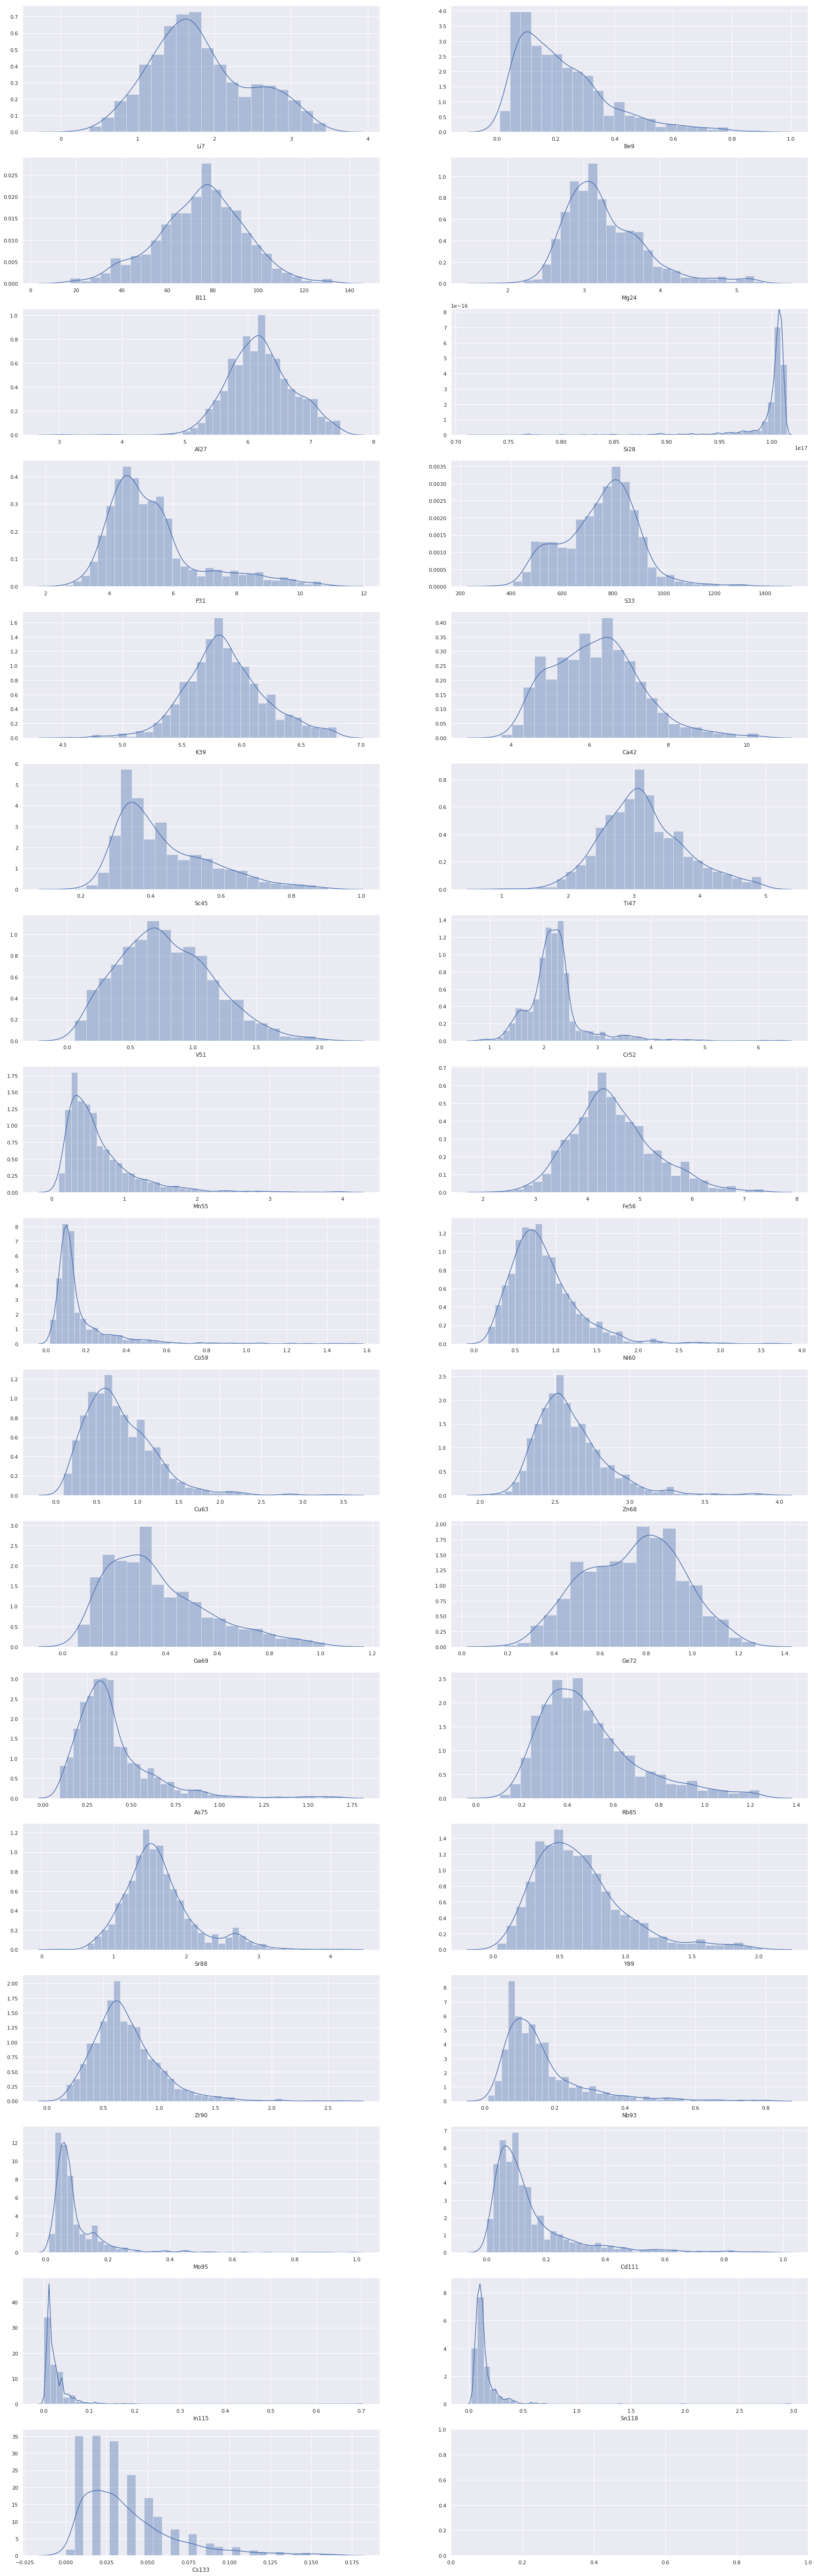

In [9]:
plot_coor = [c for c in range(0,33)] 

fig, axs = plt.subplots(ncols=2, nrows=17) 
axs = axs.flatten()

for col_name, plot_coor in zip(list(cols_for_plot), plot_coor): 
    sns.distplot(train_data_formodel_transformed[cols_for_plot][col_name], ax = axs[plot_coor])

In [10]:
%store train_data_formodel_transformed

Stored 'train_data_formodel_transformed' (DataFrame)
